In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import mpl_defaults
from mpl_defaults import autoscale_y
import matplotlib as mpl
import matplotlib.transforms as transform
import scipy
import normal_He3_params as he3
import seaborn as sns
idx = pd.IndexSlice
from numpy.fft import fft 

plt.style.use('dark_background')
%matplotlib widget

In [2]:
%%html
<style>
.cell-output-ipywidget-background {
   background-color: transparent !important;
}
.jp-OutputArea-output {
   background-color: transparent;
}  
</style>

In [3]:
def d2dx2(num, dx):
    mat = np.zeros((num+1, num+1))
    for i in range(num):
        mat[i, i] = -2
        try:
            mat[i, i-1] = 1
            mat[i, i+1] = 1
        except:pass
    return mat[0:num, 0:num]/dx**2

def ddx(num, dx):
    mat = np.zeros((num+1, num+1))
    for i in range(num):
        try:
            mat[i, i-1] = -1
            mat[i, i+1] = 1
        except:pass
    return mat[0:num, 0:num]/dx


def d2dx2_periodic(num, dx):
    mat = np.zeros((num, num))
    for i in range(num):
        mat[i,i]=-2
        try:
            mat[i, i-1]=1
            mat[i, i+1]=1
        except: pass
        return mat/dx**2
    
def ddx_periodic(num, dx):
    mat = np.zeros((num, num))
    for i in range(num):
        try:
            mat[i, i-1] = -1
            mat[i, i+1] = 1
        except:pass
    return mat/dx

In [63]:
fd = 2.3
t = np.linspace(0, 3, 1000)
dt = t[1]-t[0]
# fit params
omega_0 = 2.25
gam = 2E3/omega_0
drive = 1

ypp = d2dx2(len(t), dt)
# ypp[:, 1] *=0

yp = ddx(len(t) , dt)
# yp[:, 1] *=0

y = np.identity(len(t))

lhs = ypp + yp*gam + y*omega_0

rhs = drive*np.exp(1j*t)

soln = np.linalg.solve(lhs, rhs)

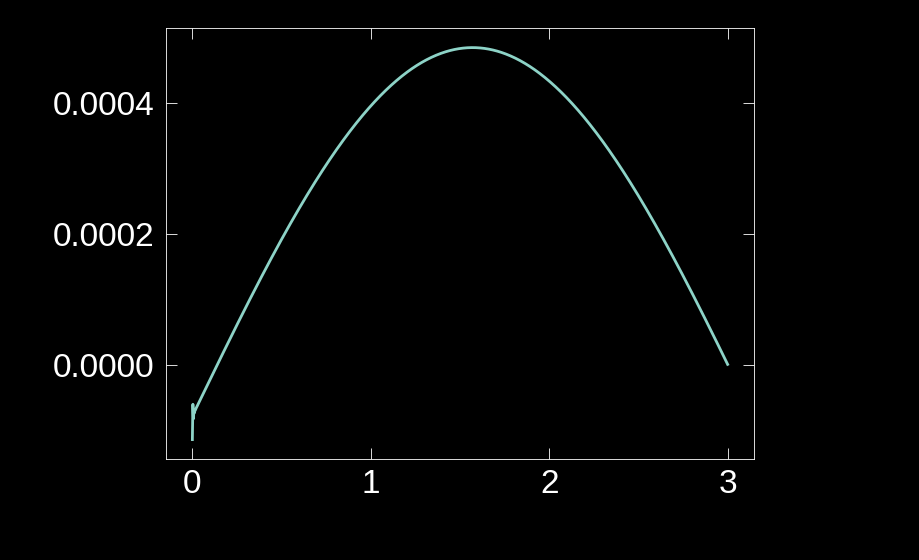

In [64]:
fig, ax = plt.subplots()

ax.plot(t, np.real(soln))